Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [12]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [13]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
gold_data.shape

(2290, 6)

In [16]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [18]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

List item

Positive Correlation

Negative Correlation

In [22]:
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

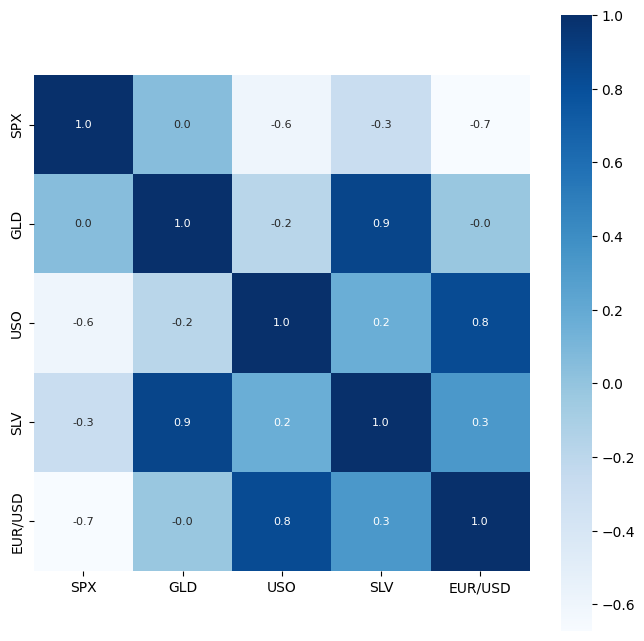

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

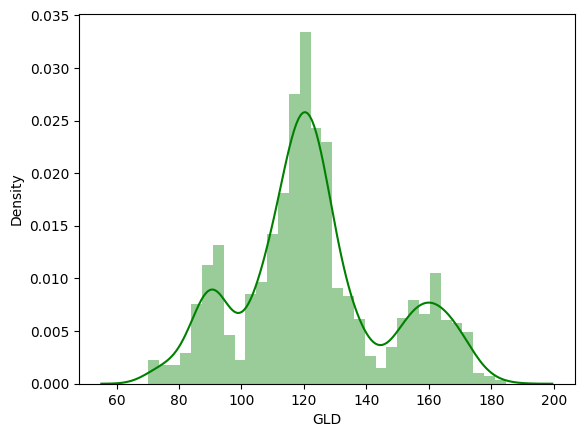

In [25]:
sns.distplot(gold_data['GLD'],color='green')

Splitting into Training data and Test Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [28]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

Model Training: Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [34]:
test_data_prediction = regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.40139928  81.82259993 115.94569995 127.68040074 120.82210145
 154.95929732 150.22369821 126.13400019 117.57949867 125.89090066
 116.58910122 172.55540068 141.17229865 167.70859848 115.0898999
 117.54660043 137.72700301 170.40030099 159.83920357 158.8173991
 154.98749973 125.23170017 175.78129985 157.26590349 125.22550047
  93.89919968  77.64000026 120.63180015 119.1018994  167.63039915
  88.14260089 125.4094998   91.25060092 117.57450025 121.1236992
 136.45410083 115.47780126 115.12120091 148.92879963 107.13140085
 104.51100237  87.21289794 126.50560035 117.71010019 152.45129882
 119.46680019 108.4034996  107.90139812  93.17960059 127.01289815
  75.22710037 113.66369926 121.5032999  111.28279933 118.82179897
 120.95969964 159.41460046 167.70680067 146.79829708  85.95709863
  94.3609004   86.83799856  90.60460022 118.98230072 126.43310052
 127.54730006 169.72960054 122.26909927 117.29999873  98.69140034
 168.76180238 143.05739875 131.52660181 121.24530227 121.24659921
 119.90330031

In [36]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891960634977995


Compare the Actual Values and Predicted Values in a Plot

In [37]:
Y_test = list(Y_test)

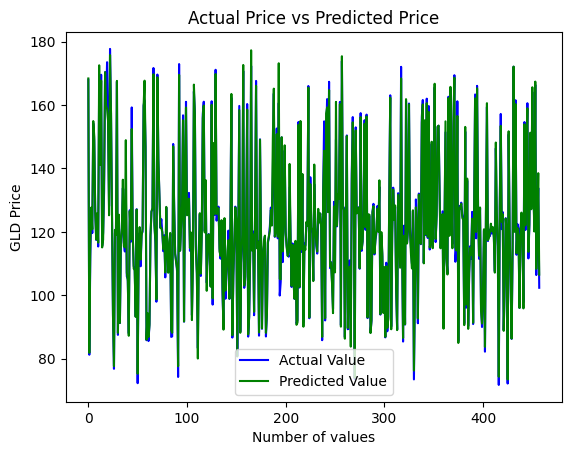

In [38]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()